# CNN in detail

We continue to look at a convolutional neural network by considering the outputs in each layer.

In [38]:
import pandas as pd

mnist_train = pd.read_csv('train.csv')

y = mnist_train['label']
X = mnist_train.drop(columns = 'label')

In [39]:
from keras.utils import to_categorical

y = to_categorical(y, num_classes=10)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform = 'pandas')
scaler.fit(X)
X = scaler.transform(X)

X = X.values.reshape(-1, 28, 28, 1)

In [41]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

In [42]:
input_shape = (28, 28, 1)

model = Sequential()

# conv layer 1
model.add(Conv2D(
    filters =6,
    strides = (1,1),
    kernel_size = (5,5),
    activation = 'ReLU',
    input_shape = input_shape
))

# pooling layer 1
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))

# conv layer 2
model.add(Conv2D(
    filters =12,
    strides = (1,1),
    kernel_size = (5,5),
    activation = 'ReLU'
))

# pooling layer 2
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))

# Flatten
model.add(Flatten())

# FC FF layer 1
model.add(Dense(units=120, activation='ReLU'))

# FC FF layer 2
model.add(Dense(units=84, activation='ReLU'))

# output layer
model.add(Dense(units=10, activation='softmax'))

In [43]:
# optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# compiling
model.compile(loss ='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 12)          1812      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 12)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [44]:
epochs = 20

history = model.fit(X, y, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/20
329/329 [==============================] - 6s 17ms/step - loss: 0.4388 - accuracy: 0.8678
Epoch 2/20
329/329 [==============================] - 6s 17ms/step - loss: 0.1313 - accuracy: 0.9586
Epoch 3/20
329/329 [==============================] - 6s 18ms/step - loss: 0.0911 - accuracy: 0.9707
Epoch 4/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0719 - accuracy: 0.9774
Epoch 5/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0609 - accuracy: 0.9804
Epoch 6/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0537 - accuracy: 0.9830
Epoch 7/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0446 - accuracy: 0.9858
Epoch 8/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0386 - accuracy: 0.9873
Epoch 9/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 10/20
329/329 [==============================] - 6s 19ms/step - loss: 0.0321 - accura

# Filtered images

As last time, we will be looking at the output of a single image.

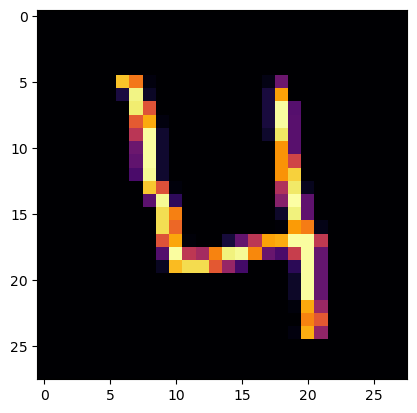

In [45]:
import matplotlib.pyplot as plt

i=3
_ = plt.imshow(X[i], cmap = 'inferno')

Let's plot the effect after the first convolution layer.
Since it has 6 filters, we obtain 6 instances of a filtered image.

In [46]:
layer1_weights = model.layers[0].get_weights()[0]

In [47]:
from keras import backend as K

layer1_output = K.function(
    [model.layers[0].input],
    [model.layers[0].output]
)
output1 = layer1_output(X)[0]

In [48]:
layer2_output = K.function(
    [model.layers[0].input],
    [model.layers[1].output]
)
output2 = layer2_output(X)[0]
output2.shape

(42000, 12, 12, 6)

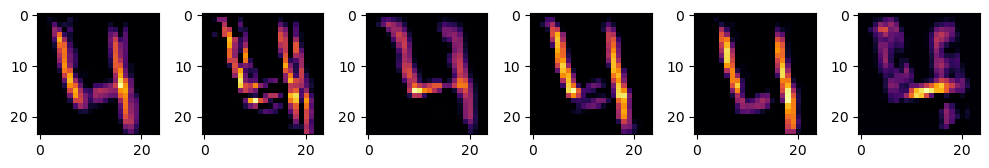

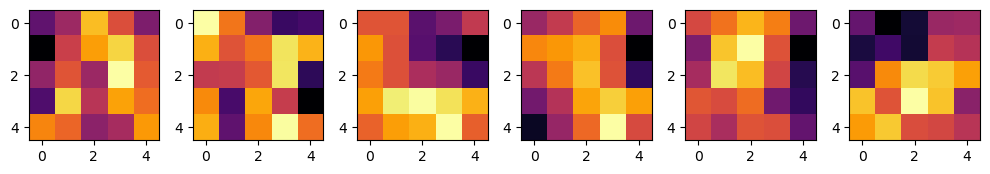

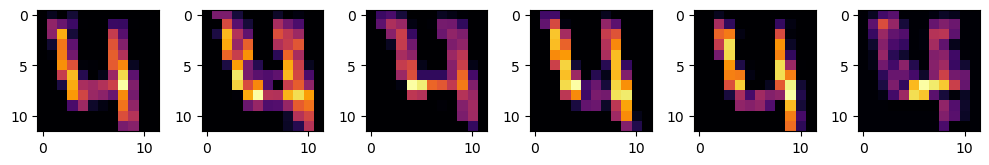

In [49]:
#%matplotlib inline

f, axarr = plt.subplots(1,6, figsize=(10,10))

# output of first convolution layer
for j in range(6):
    axarr[j].imshow(output1[i,:,:,j], cmap='inferno')
f.tight_layout()
plt.show()

# filters of first convolution layer
f, axarr = plt.subplots(1,6, figsize=(10,10))
for j in range(6):
    axarr[j].imshow(layer1_weights[:,:,:,j], cmap='inferno')
f.tight_layout()
plt.show()

# output of first pooling layer
f, axarr = plt.subplots(1,6, figsize=(10,10))
for j in range(6):
    axarr[j].imshow(output2[i,:,:,j], cmap='inferno')
f.tight_layout()
plt.show()

In [50]:
w3 = model.layers[2].get_weights()[0]
w3.shape

(5, 5, 6, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

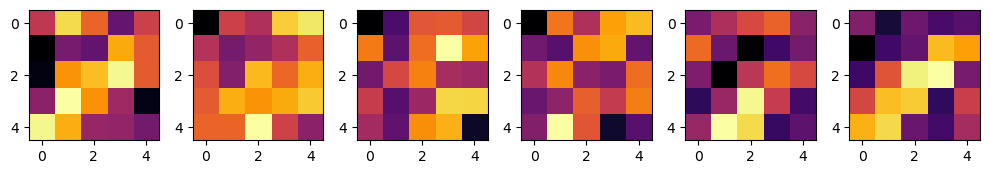

In [51]:
f, axarr = plt.subplots(1,6, figsize=(10,10))

for j in range(6):
    axarr[j].imshow(w3[:,:,j,0], cmap='inferno')
f.tight_layout()
plt.show

In [52]:
layer3_output = K.function(
    [model.layers[0].input],
    [model.layers[2].output]
)
output3 = layer3_output(X)[0]
output3.shape

(42000, 8, 8, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

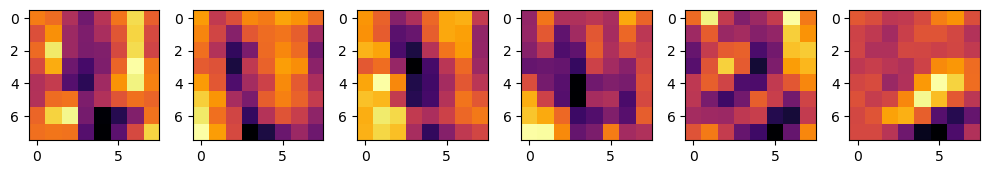

In [53]:
from scipy import signal

f, axarr = plt.subplots(1,6, figsize=(10,10))

for j in range(6):
    axarr[j].imshow(signal.correlate(output2[i,:,:,j], w3[:,:,j,0], mode='valid'), cmap='inferno')
f.tight_layout()
plt.show

In [54]:
import numpy as np

Z = np.zeros((8,8))
Z.shape

(8, 8)

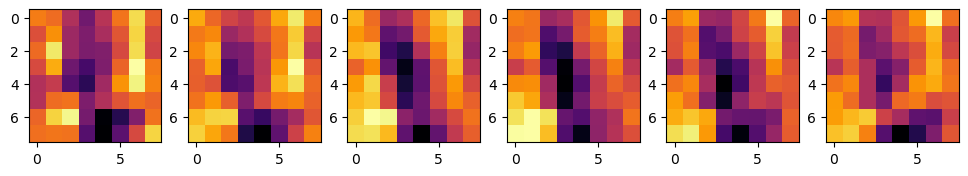

In [55]:

f, axarr = plt.subplots(1,6, figsize=(12,12))
for j in range(6):
    Z = Z + signal.correlate(output2[i,:,:,j], w3[:,:,j,0], mode='valid')
    axarr[j].imshow(Z, cmap='inferno')

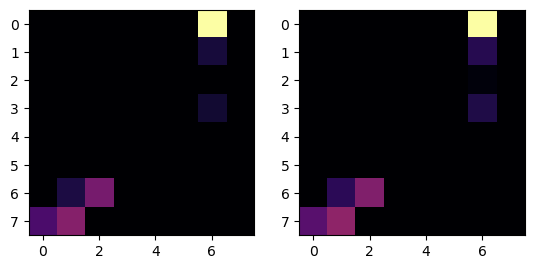

In [56]:
def ReLU(x):
    return x * (x>0)
vec_relu = np.vectorize(ReLU)

Z = vec_relu(Z)
f, axarr = plt.subplots(1,2)
_ = axarr[0].imshow(Z, cmap='inferno')
_ = axarr[1].imshow(output3[i,:,:,0], cmap='inferno')

# Flattening

Finally, let's talk about pooling.
The idea is very simple.
We simply look at the response in each area of our filtered image.
Here we used `MaxPooling` with a size of $(2,2)$ and stride of same size.
This means that we look at $(2,2)$ submatrices and return the max value.
The idea here is that we don't care where the response is, only that there is a response at all.
For example, suppose we have a filter which is able to detect an eye in a picture, then we just want to know that there is one, not where it is.

In [57]:
get_layer5_output = K.function(
  [model.layers[0].input], 
  [model.layers[4].output]) 

output5 = get_layer5_output([X])[0]
output5.shape

(42000, 192)

In [58]:
conv_output = np.expand_dims(output5[3], axis=1)
conv_output = conv_output[:20, :]

In [59]:
conv_output = np.expand_dims(conv_output, axis=2)

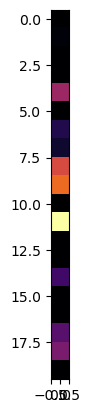

In [60]:
_ = plt.imshow(conv_output, cmap='inferno')